# **Capstone Project**

**Project proposal to predict credit card approval**

- A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

- Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.


- Credit card score are generally built on historical data, the predictive models built upon these data are subjected to economic fluctuations. Hence, it is very important to tune with latest data and build resilient models. At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring.

- Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. Also, unbalance data problem is a big problem in this task.



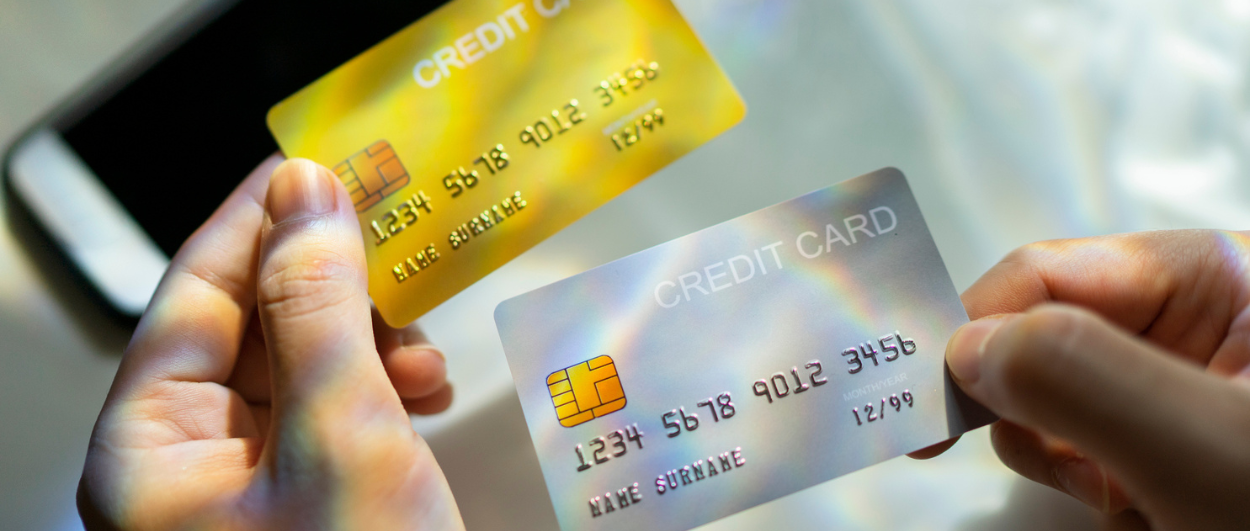

# **Machine Learning Development LifeCycle (MLDLC)**

- Data Preprocessing
- Explorartory Data Analysis (EDA)
- Handling Missing Values & Outliers
- Feature Engineering & Feature Transformation
- Model Traning & Model Selection
- Testing & Optimizing

# **Data Importing**



In [1]:
# Importing required libaries

import numpy as np
import pandas as pd

# Visualization libaraires
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings("ignore")

- We have two dataset with us

 1) with Dependent Variables.

 2) with Independent Variables

In [2]:
# importing dataset

credit = pd.read_csv('/content/Credit_card.csv')

credit.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
credit.shape

(1548, 18)

In [4]:
#  importing dataset

credit_label = pd.read_csv('/content/Credit_card_label.csv')

credit_label.sample(5)

,Ind_ID,label
1370,5044594,0
1357,5132329,0
694,5021490,0
1091,5135863,0
1280,5139846,0


Label:

- 0 is application approved
- 1 is application rejected

In [5]:
credit_label.shape

(1548, 2)

In [6]:
# mergeing both datasets

df = credit.merge(credit_label , how ='inner', on='Ind_ID')

df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


# **Data Preprocessing**

In [7]:
df.shape

(1548, 19)

In [8]:
# checking for duplicate values

df.duplicated().sum()

0

In [9]:
# checking all columns

df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

**Renaming the features**

In [10]:

df.rename(columns={'GENDER':'Gender','Propert_Owner':'Property_owner','CHILDREN':'Children',
                   'Type_Income':'Income_type','EDUCATION':'Education','EMAIL_ID':'Email_ID',
                   'Type_Occupation':'Occupation_type'}, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Income_type      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_ID         1548 non-null   int64  
 16  Occupation_type  1060 non-null   object 
 17  Family_Members

In [12]:
# checking for misiing values

df.isnull().sum()

Ind_ID               0
Gender               7
Car_Owner            0
Property_owner       0
Children             0
Annual_income       23
Income_type          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_ID             0
Occupation_type    488
Family_Members       0
label                0
dtype: int64

Missing values in the below features:
- Gender
- Annual_income
- Occupation_type
- Birthday_count

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

In [13]:
# Creating new column by dividing the birthday_count with 365, by which we get age in years

df['Age_in_years'] = np.abs((df['Birthday_count'])/365)

df['Age_in_years'].sample(5)

635     27.452055
453     47.219178
686     27.093151
1360    55.164384
1429    38.460274
Name: Age_in_years, dtype: float64

In [14]:
# Checking if there are any employed_days > 0

df[df['Employed_days']>0].shape

(261, 20)

- There are 261 records which have employed days in positive (so there are not working)
- Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

In [15]:
# Crearting new column which gives experience in years by dividing employed_days with 365

df['Experience_years']= np.abs(df['Employed_days'])/365

df['Experience_years'].sample(5)

352     1000.665753
1362    1000.665753
847        5.715068
9          1.857534
1316       5.635616
Name: Experience_years, dtype: float64

# **Explorartory Data Analysis (EDA)**

In [22]:
sns.set_style('dark')

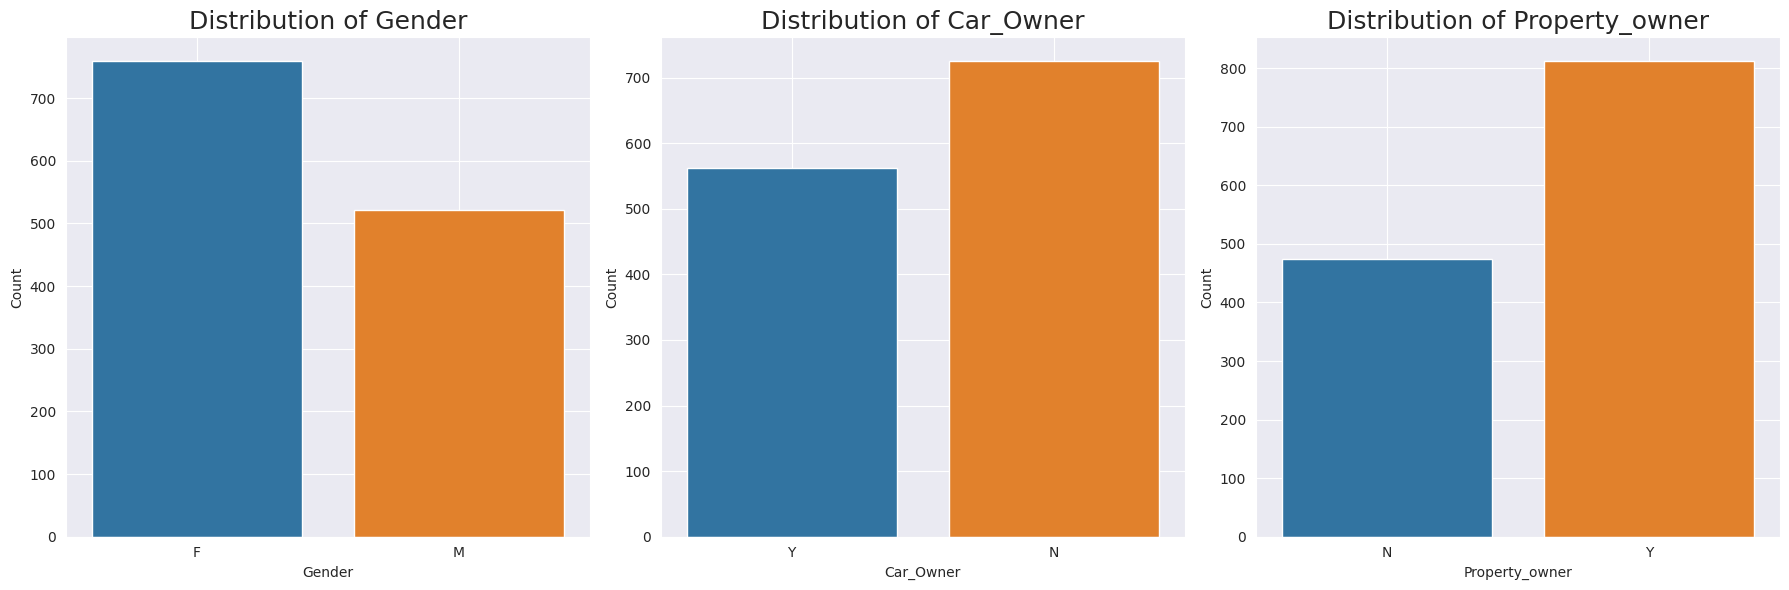

In [23]:


cols = ['Gender', 'Car_Owner', 'Property_owner']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


- The dataset displays a higher representation of females, suggesting that either more females are applying for credit cards.
- A notable majority of individuals in the dataset do not own a car, which could be attributed to mutiple factors like personal choices etc.
- Most individuals in the dataset are property owners, indicating that property ownership, might be a significant factor in credit card approval decisions.

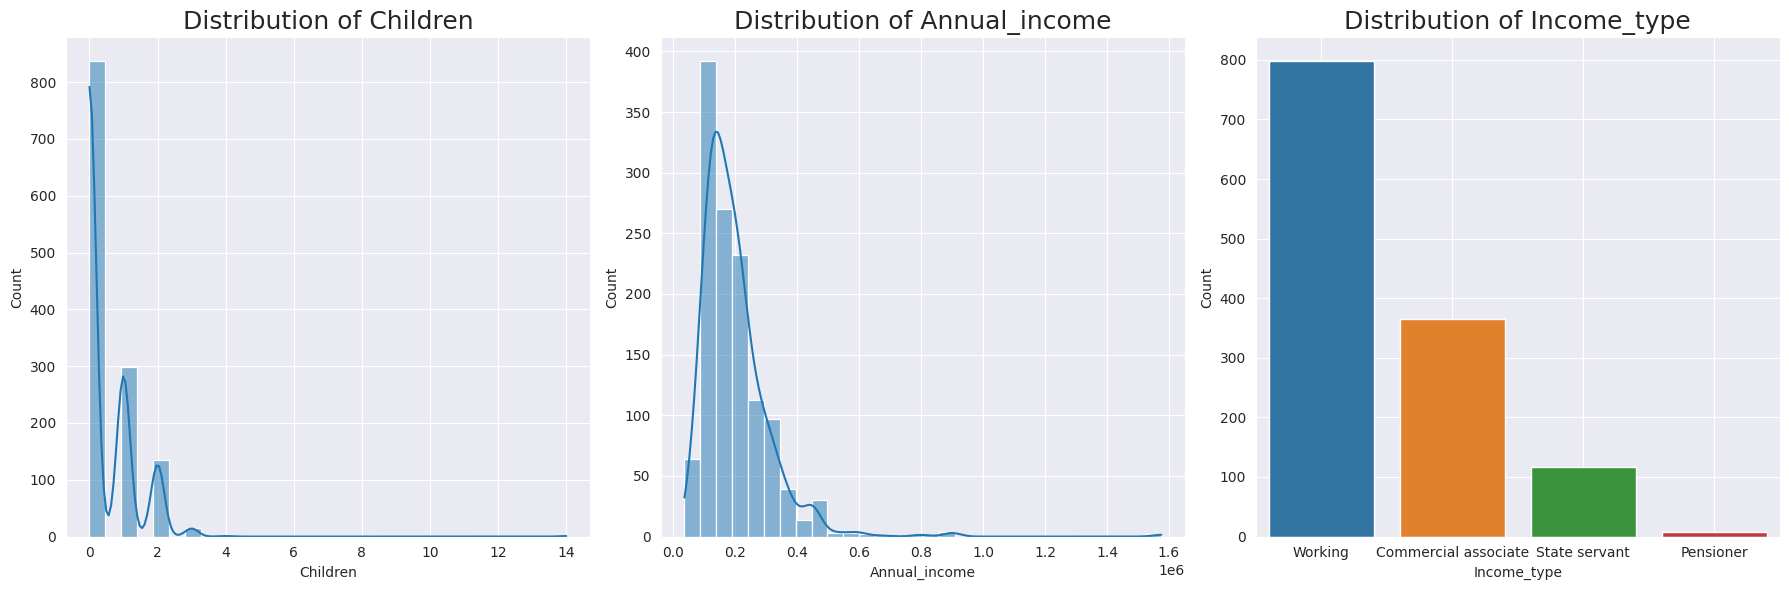

In [24]:

cols = ['Children', 'Annual_income', 'Income_type']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=col, ax=axes[i], bins=30, kde=True)
    else:
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)

    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)


plt.tight_layout()
plt.show()


- Most individuals in the dataset either have no children or just one, with a decreasing number of individuals having two or more children.
- The annual income distribution is predominantly right-skewed, suggesting that most individuals have a lower to medium income, with a few outliers in the higher income bracket.
- Regarding income type, "Working" is the predominant category, succeeded by "Commercial associate" and "Pensioner", while categories like "State servant" have fewer representatives.

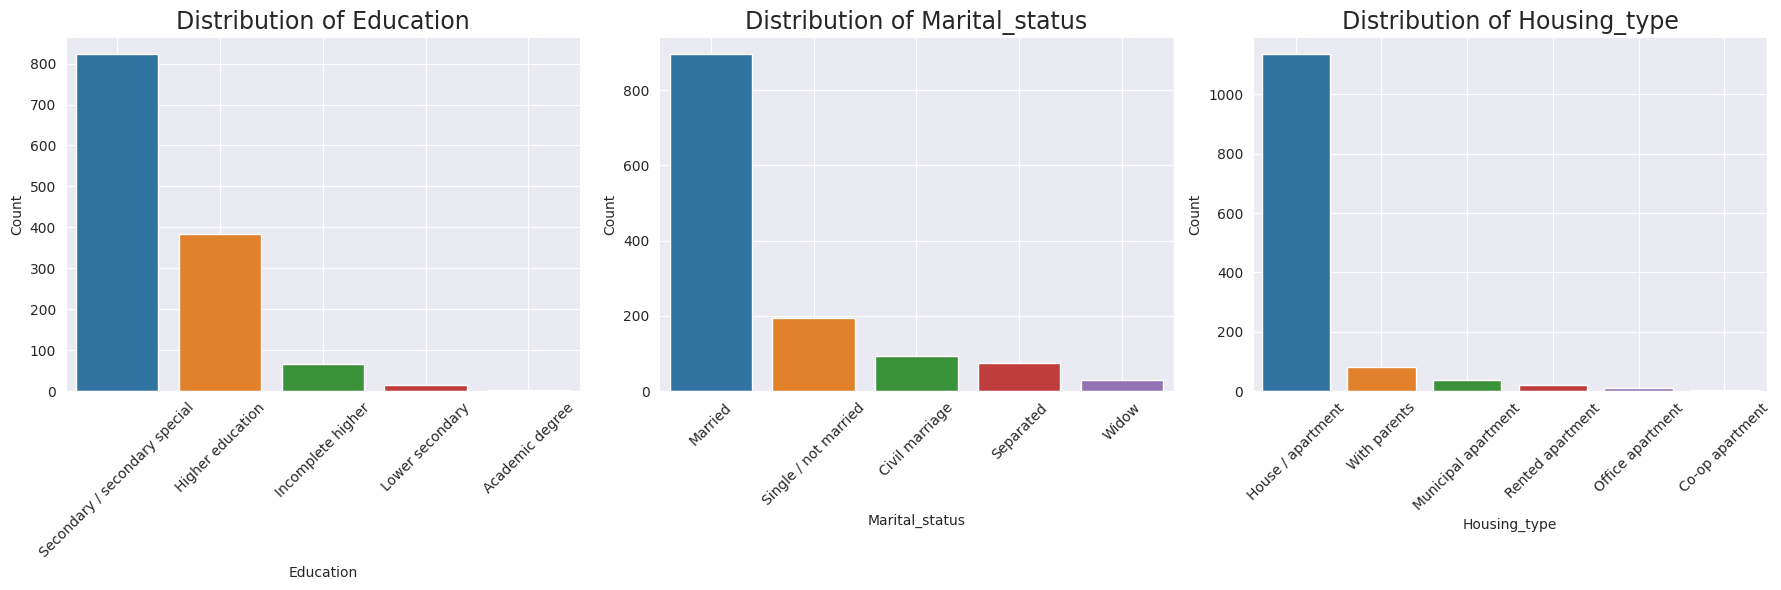

In [25]:

cols = ['Education', 'Marital_status', 'Housing_type']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize = 17)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation = 45)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


- In terms of education, the dataset predominantly consists of individuals with a "Secondary / secondary special" education level, akin to high school. While a significant number have "Higher education", fewer individuals fall into categories like "Incomplete higher" and "Lower secondary", and only a small fraction possess an "Academic degree" signifying advanced academic qualifications.
- When observing marital status, most individuals are "Married", with other statuses such as "Single / not married", "Civil marriage", "Separated", and "Widow" appearing in descending order of frequency.
- As for housing, the majority reside in a "House / apartment", with other housing arrangements like "With parents", "Municipal apartment", and "Rented apartment" being less frequent. The dataset contains very few individuals living in "Office apartment" or "Co-op apartment"

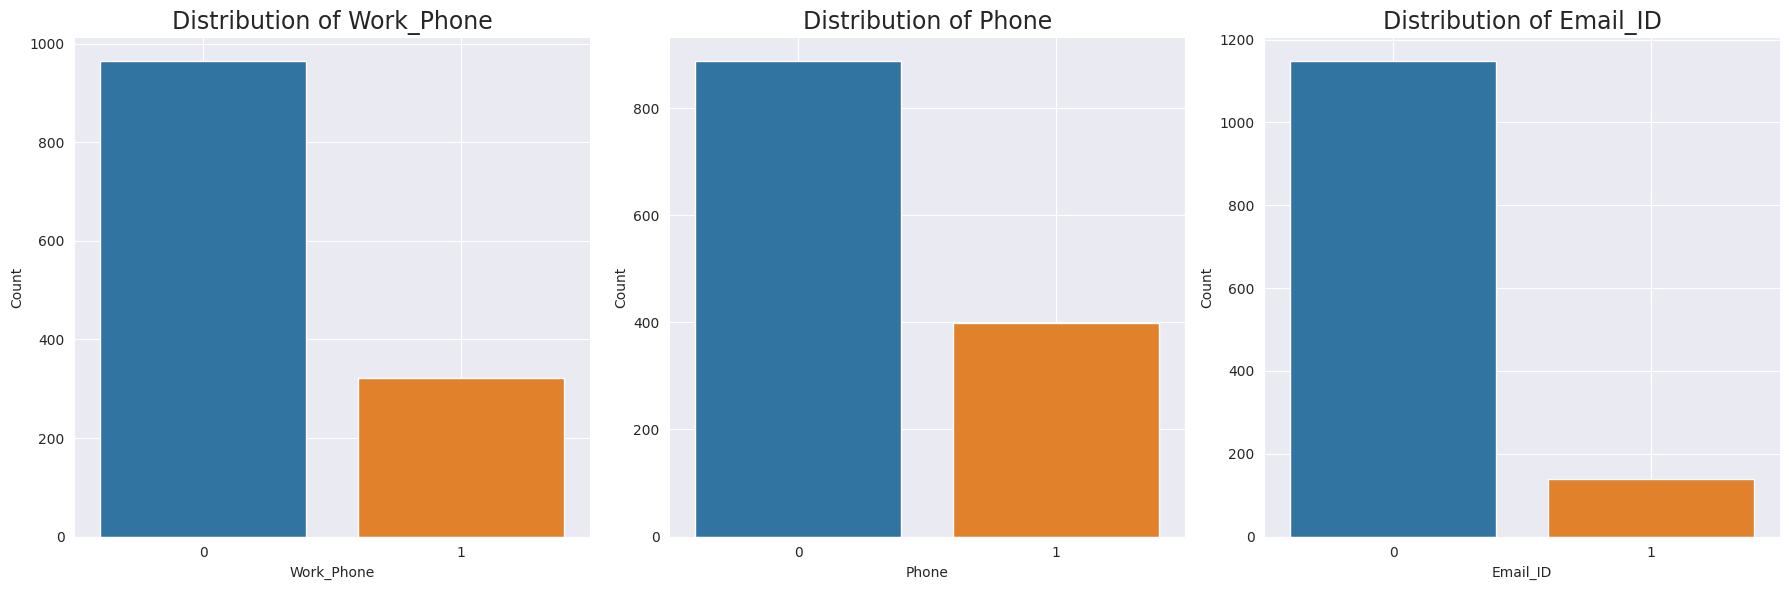

In [26]:

cols = ['Work_Phone', 'Phone', 'Email_ID']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize = 17)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


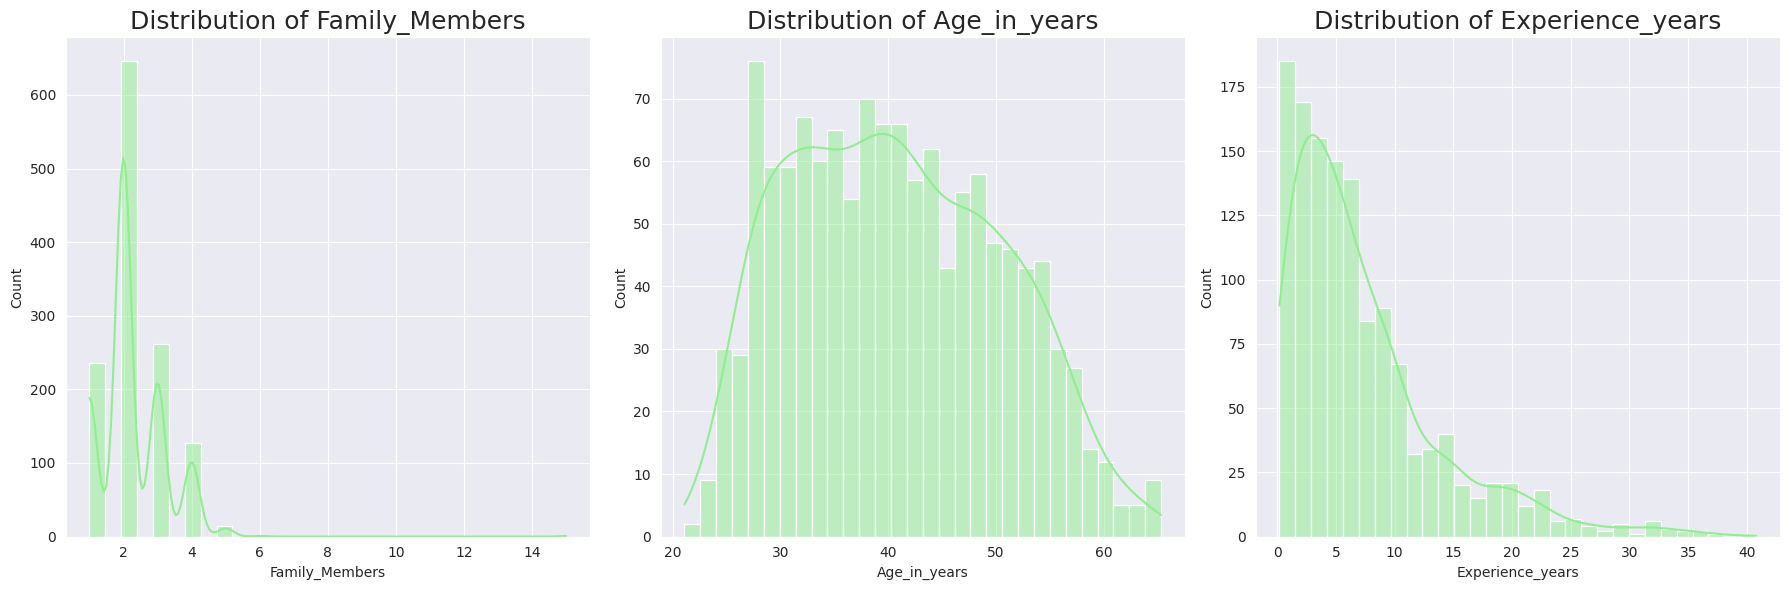

In [27]:

cols = ['Family_Members', 'Age_in_years', 'Experience_years']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=col, ax=axes[i], bins=30, kde=True , color ='lightgreen')
    else:
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index , color ='green')

    axes[i].set_title(f'Distribution of {col}', fontsize = 18)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()

plt.show()


**Annual Income**

 - The Annual_income feature has some outliers and
 - It is right skewed

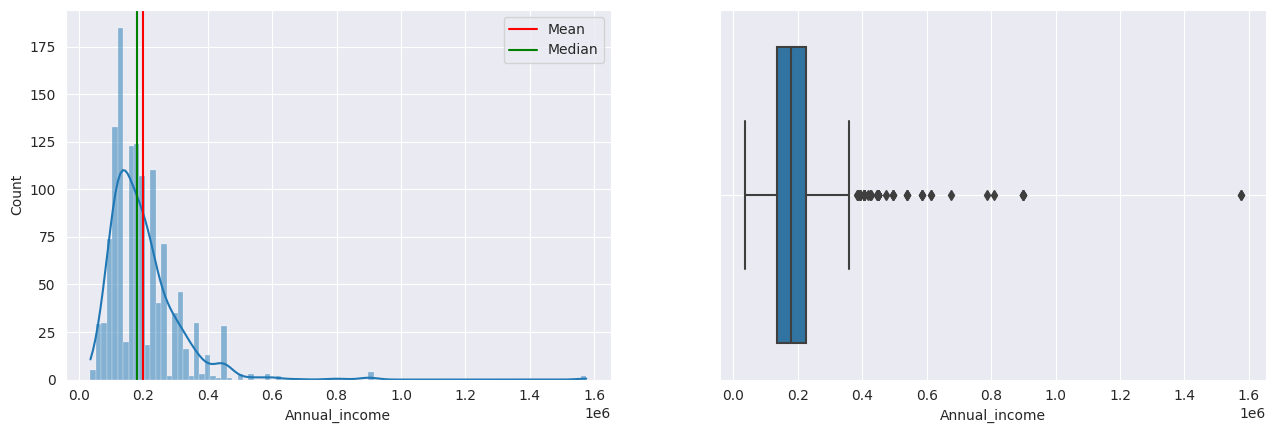

In [28]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

**Experience_years**

 - The feature Experience_years is right skewed and has some outliers.

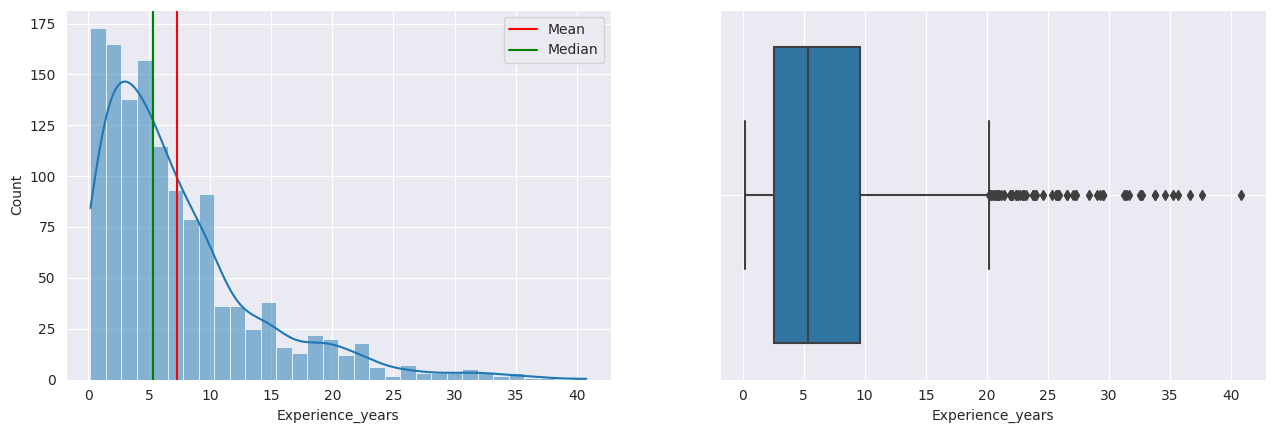

In [29]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Experience_years',kde=True)
plt.axvline(x=df['Experience_years'].mean(),color="red",label="Mean")
plt.axvline(x=df['Experience_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Experience_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

**Label**
- 0 is application approved and 1 is application rejected.
- This clearly shows that this isimbalanced dataset as there is a huge difference between approved (0) and rejected (1) applications

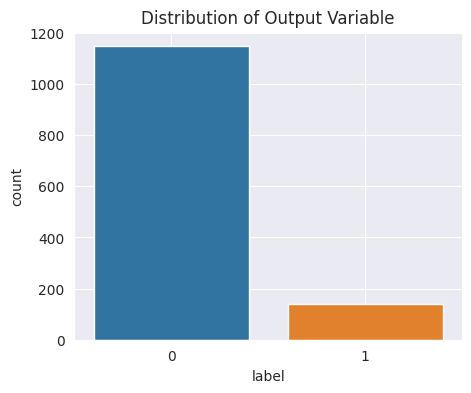

In [30]:

plt.figure(figsize =(5,4))
sns.countplot(data=df, x='label')
plt.title("Distribution of Output Variable")
plt.grid()
plt.show()

**Anuual Income Vs remaning features**

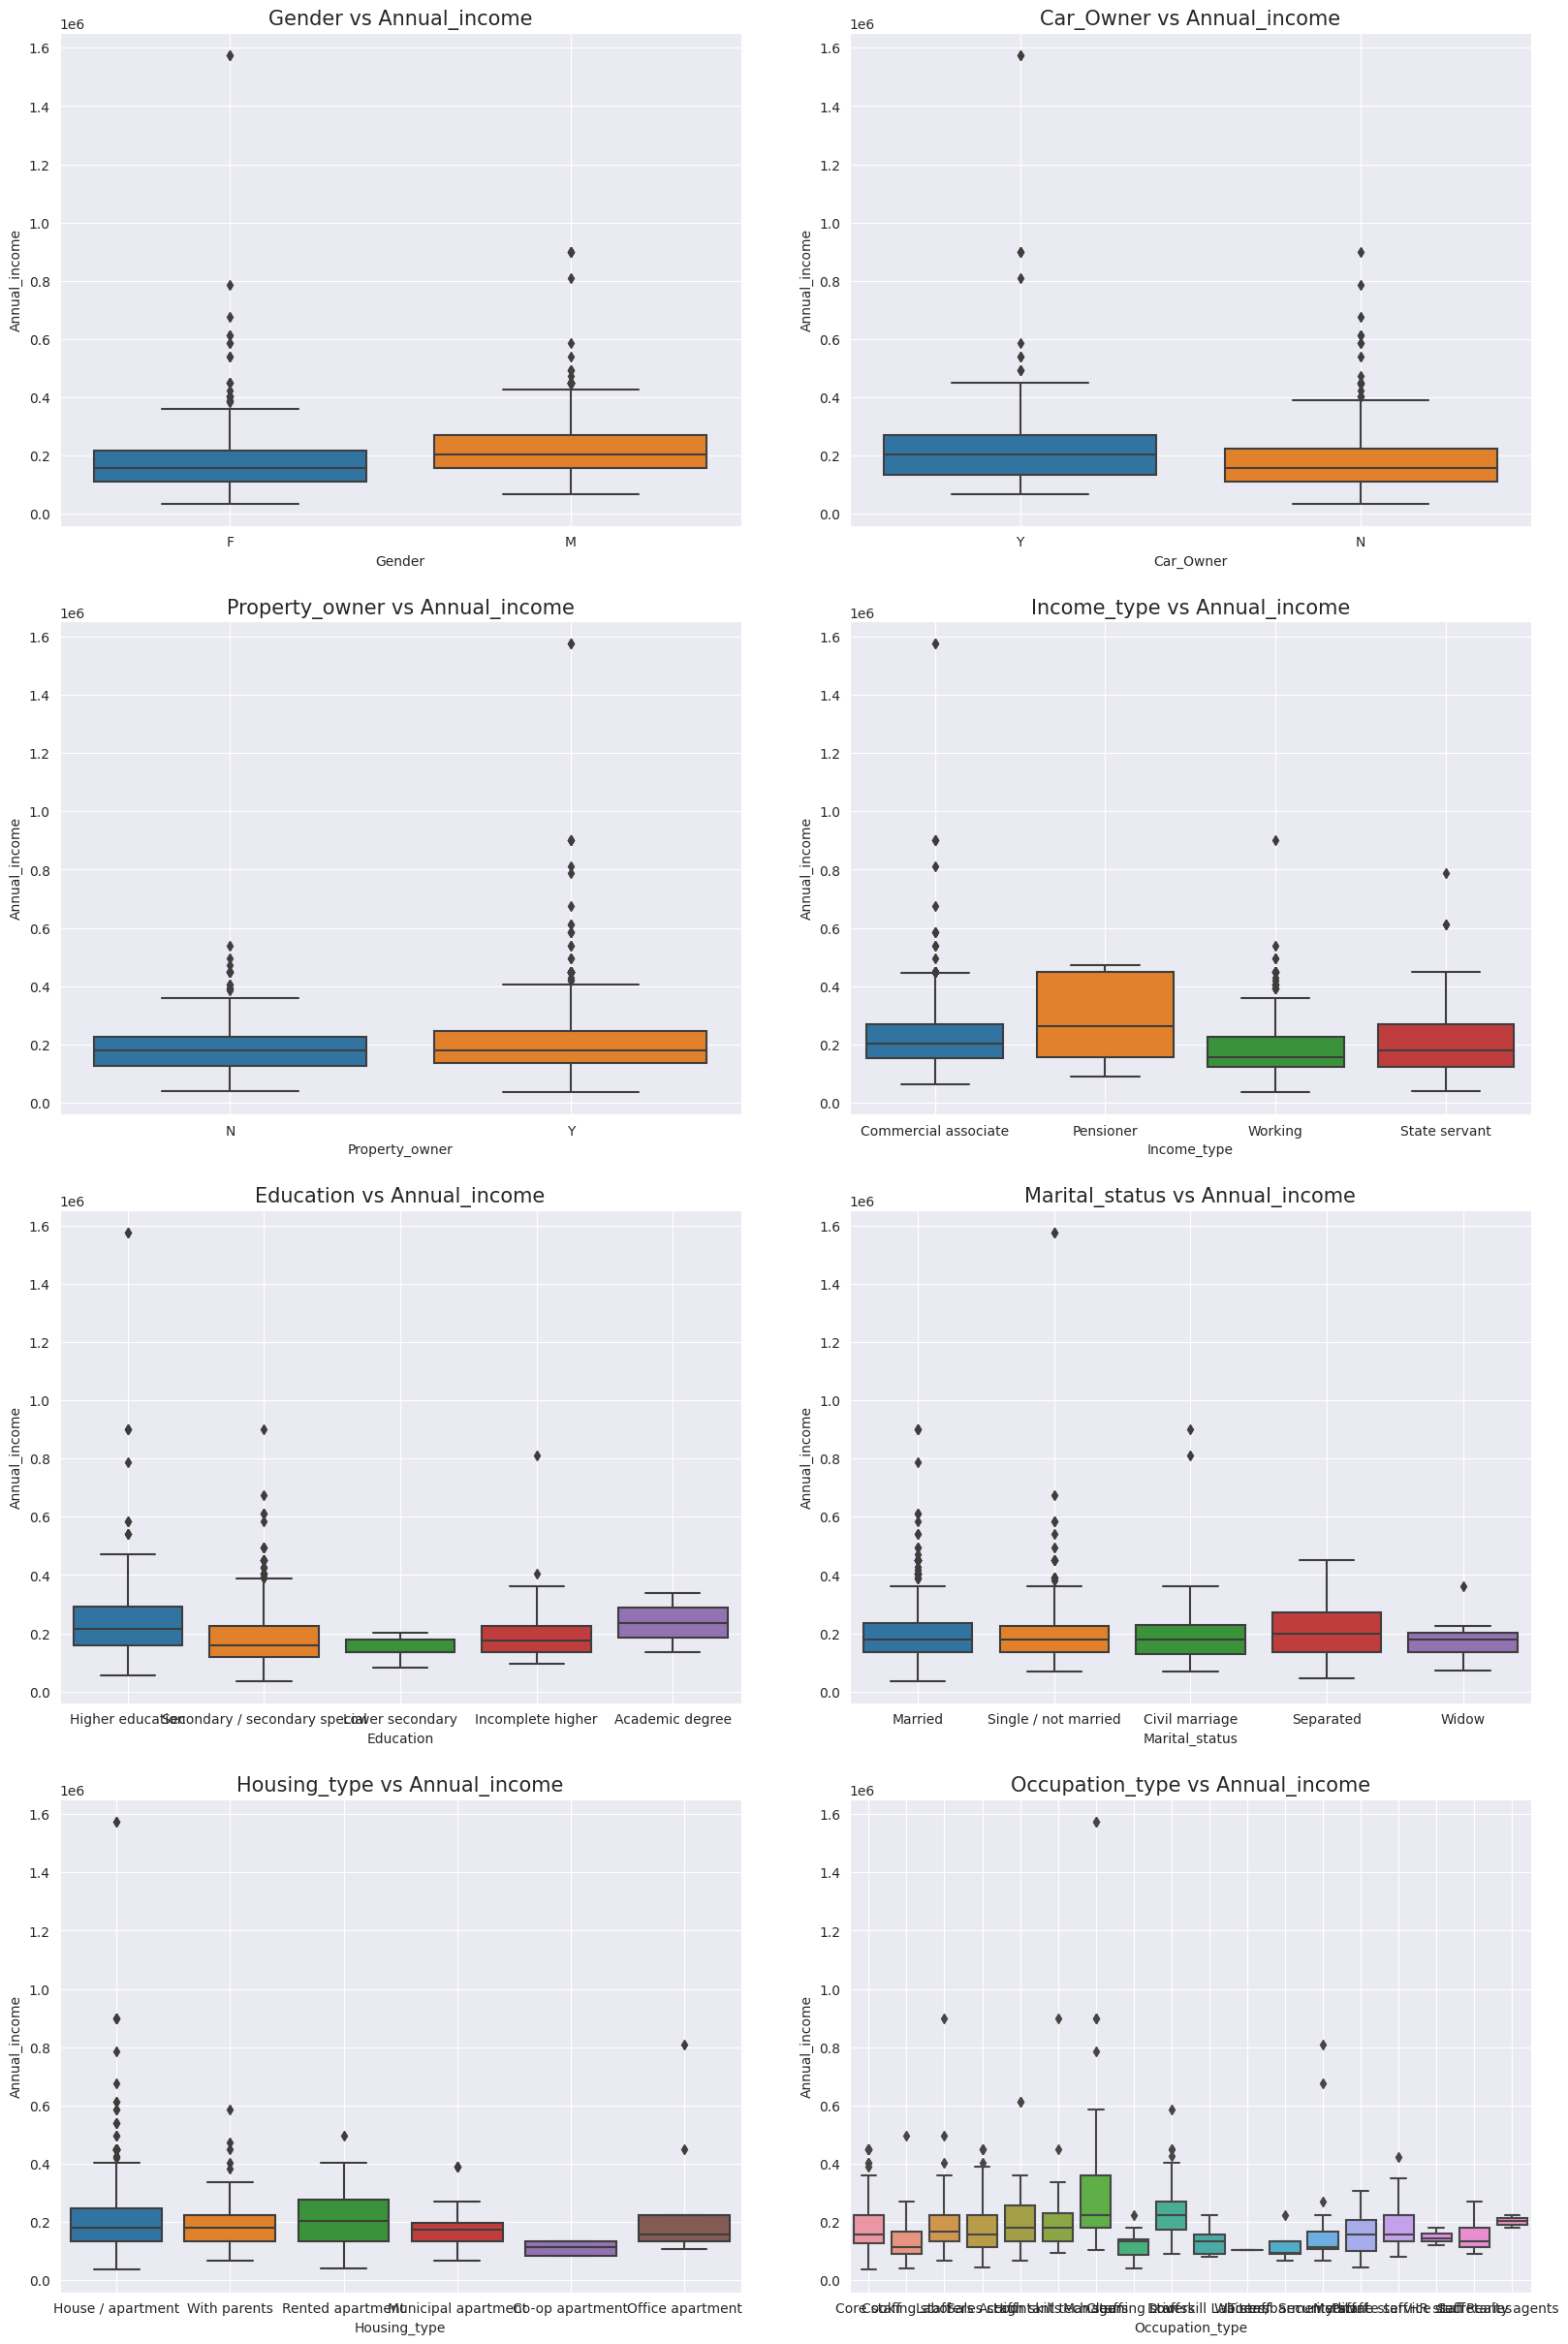

In [31]:
cols = ['Gender', 'Car_Owner', 'Property_owner', 'Income_type', 'Education', 'Marital_status', 'Housing_type', 'Occupation_type']


fig, axes = plt.subplots(4, 2, figsize=(17, 25))
fig.tight_layout(pad=5)

# Loop through each categorical feature and create a boxplot
for i, ax in enumerate(axes.ravel()):
    if i < len(cols):
        sns.boxplot(data=df, x=cols[i], y='Annual_income', ax=ax)
        ax.set_title(cols[i] + ' vs Annual_income', fontsize = 15)
        ax.tick_params(axis='x')
        ax.grid(True)

plt.show()


- Despite a higher number of female applicants, males generally have a greater income.
- Higher-income applicants are more likely to own cars. The ownership of property doesn't significantly influence the average income.
- Those with an academic degree tend to have the highest annual incomes.
- Additionally, managers and drivers earn more compared to other occupations.
- Applicants with a higher annual income often reside in rented apartments, irrespective of their marital status.

**Experience vs remaning features**

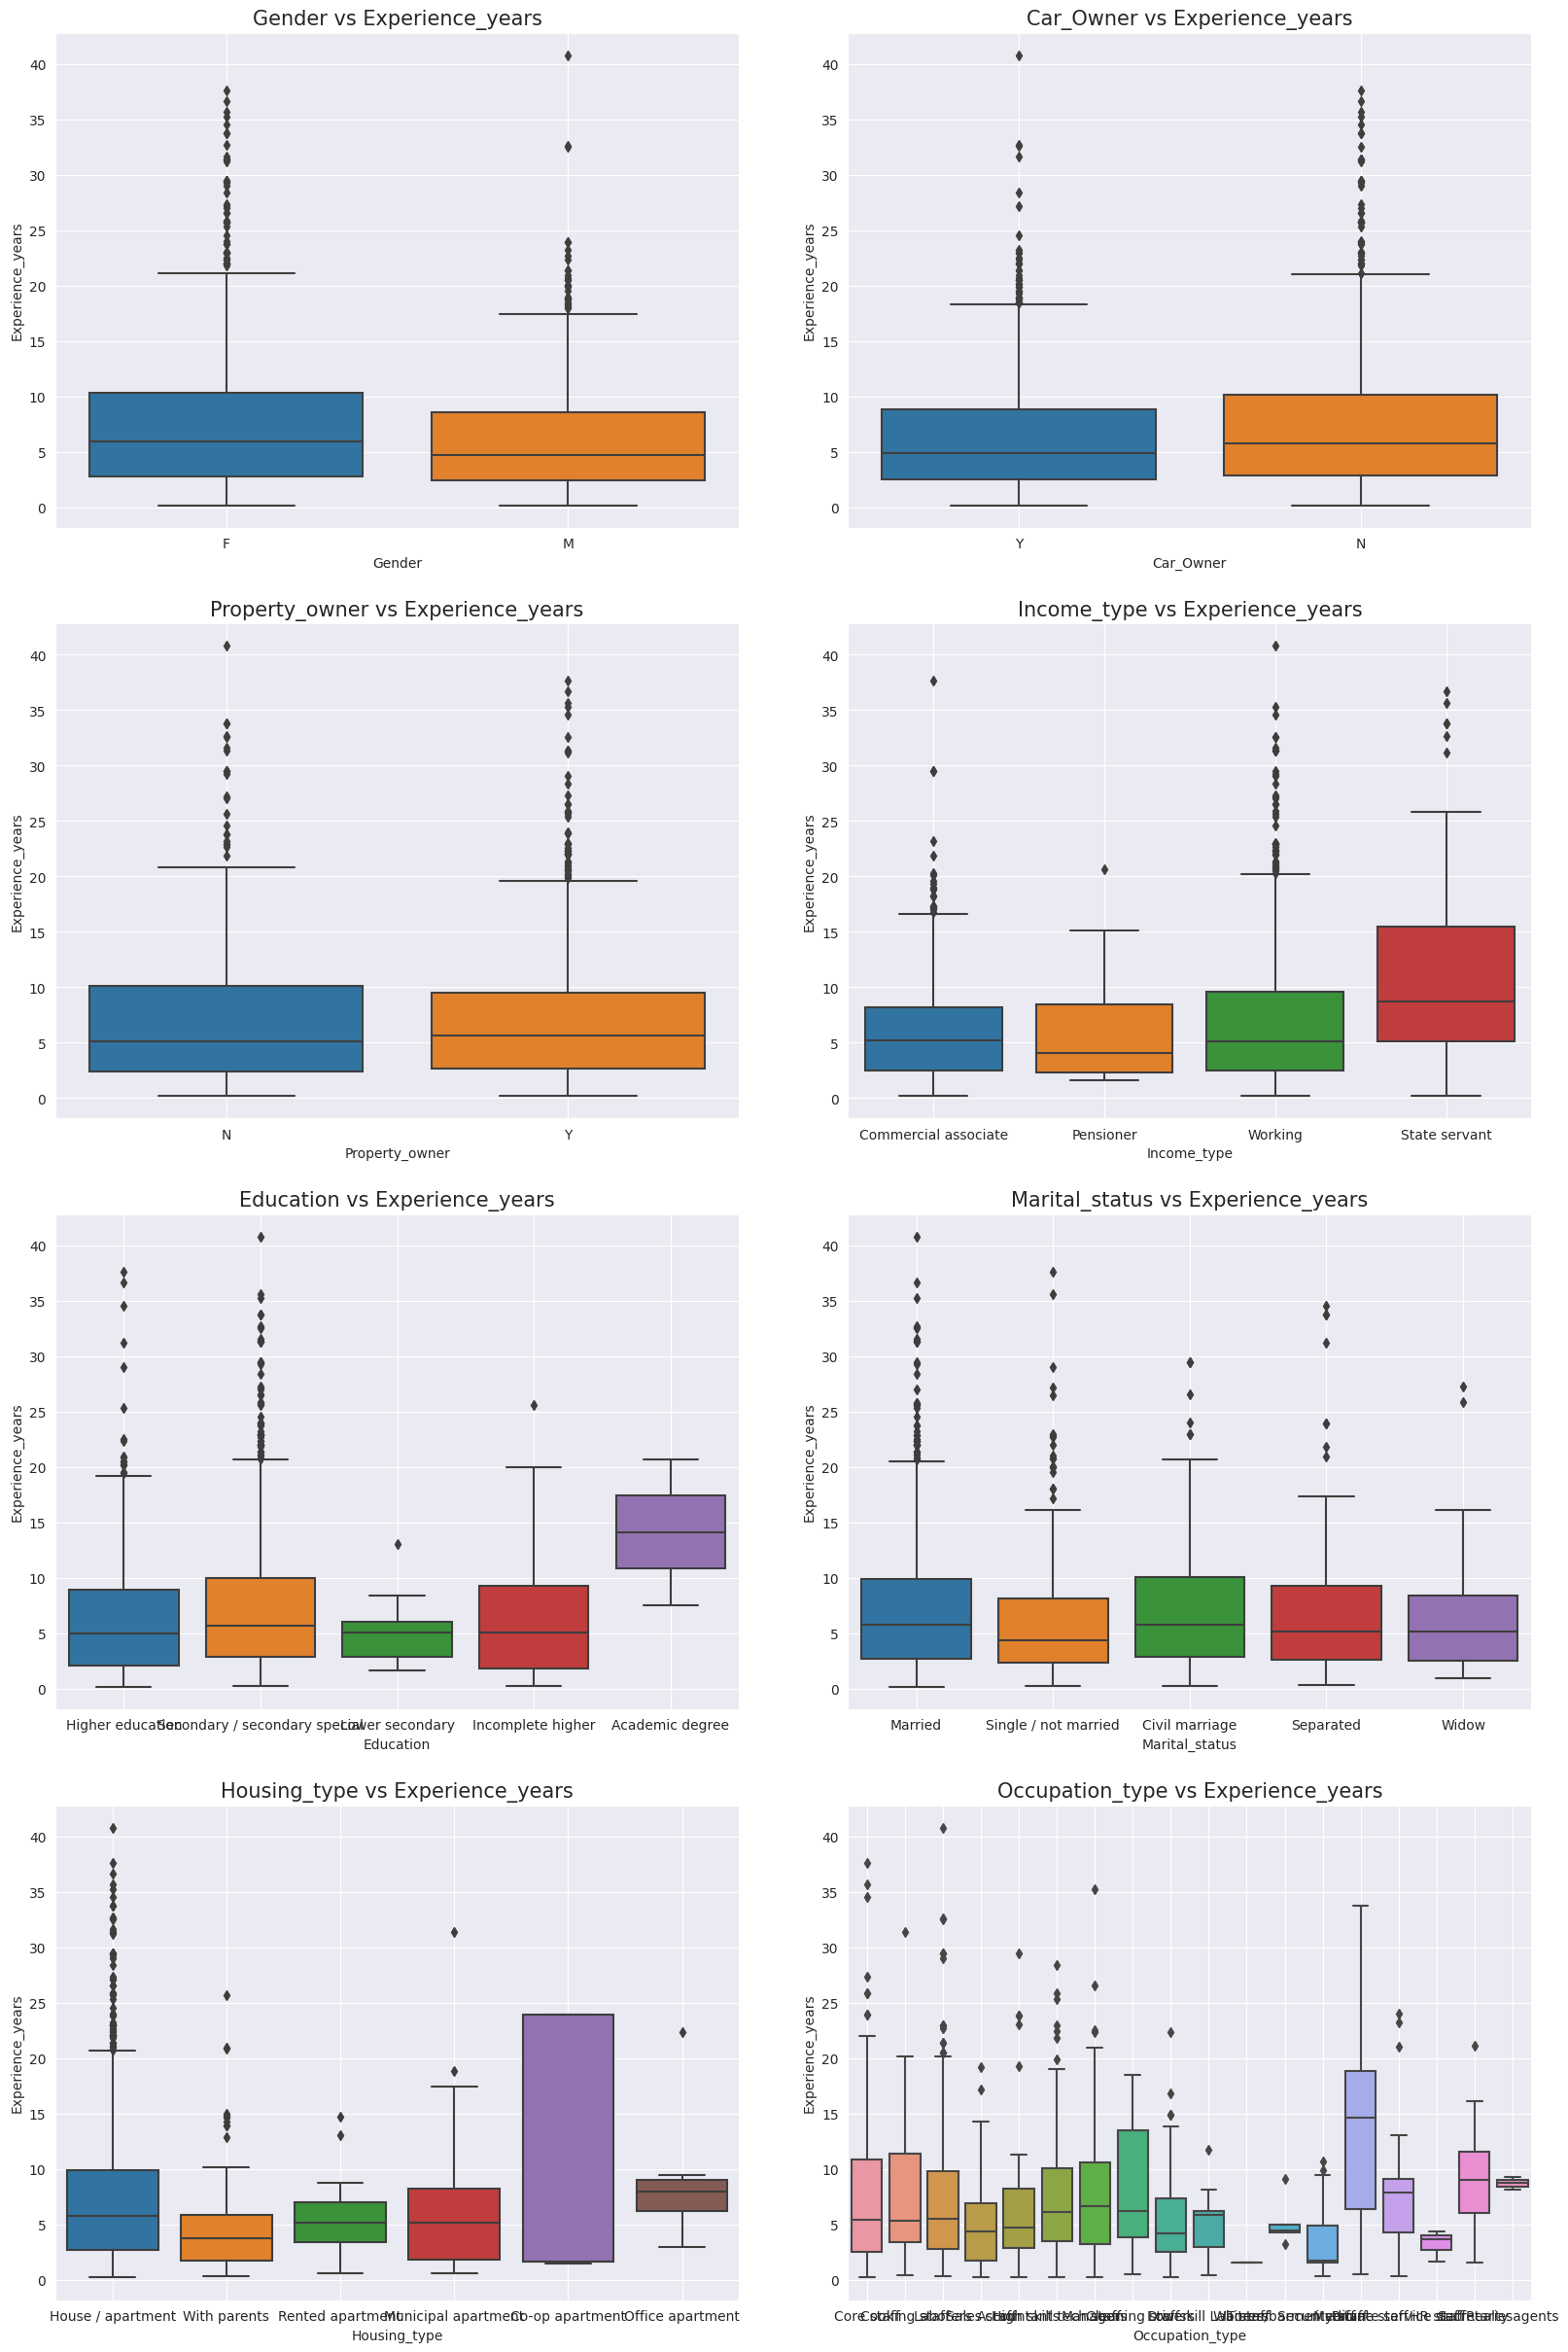

In [32]:
cols = ['Gender', 'Car_Owner', 'Property_owner', 'Income_type', 'Education', 'Marital_status', 'Housing_type', 'Occupation_type']


fig, axes = plt.subplots(4, 2, figsize=(17, 25))
fig.tight_layout(pad=5)

# Loop through each categorical feature and create a boxplot
for i, ax in enumerate(axes.ravel()):
    if i < len(cols):
        sns.boxplot(data=df, x=cols[i], y='Experience_years', ax=ax)
        ax.set_title(cols[i] + ' vs Experience_years', fontsize = 15)
        ax.tick_params(axis='x')
        ax.grid(True)

plt.show()


- Both male and female applicants have comparable levels of experience.
- State servants and medicine staff tend to have the most experience among professions.
- Those with an academic degree usually possess more work experience.

In [33]:
features=['Annual_income','Children','Family_Members','Age_in_years', 'Experience_years']

df[features].corr()

,Annual_income,Children,Family_Members,Age_in_years,Experience_years
Annual_income,1.000000,0.049350,0.023836,-0.008012,-0.019428
Children,0.049350,1.000000,0.903850,-0.181872,-0.019140
Family_Members,0.023836,0.903850,1.000000,-0.143585,-0.006763
Age_in_years,-0.008012,-0.181872,-0.143585,1.000000,0.336366
Experience_years,-0.019428,-0.019140,-0.006763,0.336366,1.000000


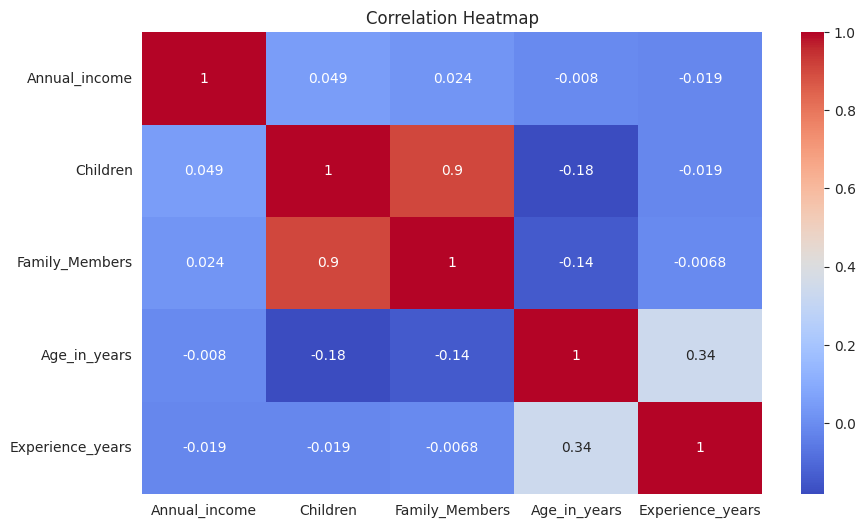

In [34]:

plt.figure(figsize = (10,6))
sns.heatmap(df[features].corr(), annot=True , cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- Children and Family members have linear corelation, that means more no of children results in more members in the family,so one of these features should be dropped
- Age and experience also show some corelation

# **Missing Values Imputations**

In [35]:
# checling for missing values

df.isnull().sum()

Gender                6
Car_Owner             0
Property_owner        0
Children              0
Annual_income        19
Income_type           0
Education             0
Marital_status        0
Housing_type          0
Mobile_phone          0
Work_Phone            0
Phone                 0
Email_ID              0
Occupation_type     227
Family_Members        0
label                 0
Age_in_years         18
Experience_years      0
dtype: int64

**1) Handling missing values of Gender**

In [36]:

df["Gender"].isnull().sum()

6

In [37]:
# cheking for unique values

df["Gender"].unique()

array(['F', nan, 'M'], dtype=object)

In [38]:
# Impute missing values in 'Gender' column with the mode (most frequent value)

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [39]:
df["Gender"].value_counts()

F    765
M    522
Name: Gender, dtype: int64

**2) Handling missing values of Annual_income**

In [40]:
df["Annual_income"].isnull().sum()

19

In [41]:
mean_inc_byincome_type = df.groupby(['Income_type'])['Annual_income'].mean()

mean_inc_byincome_type

Income_type
Commercial associate    234600.000000
Pensioner               288000.000000
State servant           211422.413793
Working                 181048.757306
Name: Annual_income, dtype: float64

In [42]:
# Impute missing values in 'Annual_Income' column with the mean

for income_type, mean_inc in mean_inc_byincome_type.items():
    df.loc[(df['Income_type'] == income_type) & (df['Annual_income'].isna()), 'Annual_income'] = mean_inc

In [43]:
# checking if any missing values

df["Annual_income"].isnull().sum()

0

**3) Handling missing values of Annual_income**

In [44]:
df["Age_in_years"].isnull().sum()

18

In [45]:
mean_income_type = df.groupby(['Income_type'])['Age_in_years'].mean()

mean_income_type

Income_type
Commercial associate    40.219428
Pensioner               41.843493
State servant           41.490269
Working                 40.789276
Name: Age_in_years, dtype: float64

In [46]:
# Impute missing values in 'Age_in_years' column with the mean

for income_type, mean_age in mean_income_type.items():
    df.loc[(df['Income_type'] == income_type) & (df['Age_in_years'].isna()), 'Age_in_years'] = mean_age

In [47]:
df["Age_in_years"].isnull().sum()

0

## **4) Handling missing values of Occupation_type**


- Dropping this column as multiple values are missing

In [48]:
df.head()

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age_in_years,Experience_years
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,40.219428,1.605479
3,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
5,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479


In [49]:
df['Occupation_type'].isnull().sum()

227

In [50]:
df['Occupation_type'].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Occupation_type, dtype: int64

In [51]:
df.drop(columns = ['Occupation_type'] , inplace = True)

In [52]:
df.head()

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Family_Members,label,Age_in_years,Experience_years
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.605479
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,40.219428,1.605479
3,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.605479
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.605479
5,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.605479


In [53]:
df.shape

(1287, 17)

# **Outlier Treatment**

In [54]:
df.columns

Index(['Gender', 'Car_Owner', 'Property_owner', 'Children', 'Annual_income',
       'Income_type', 'Education', 'Marital_status', 'Housing_type',
       'Mobile_phone', 'Work_Phone', 'Phone', 'Email_ID', 'Family_Members',
       'label', 'Age_in_years', 'Experience_years'],
      dtype='object')

**1) Annual_income Column**

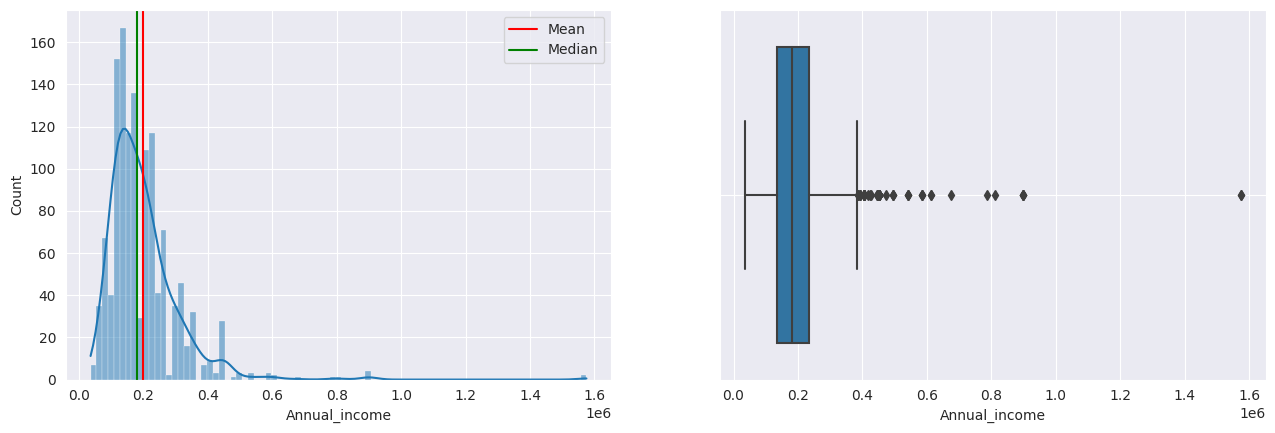

In [55]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

- Using IQR method to handle the outliers

In [56]:
Q1 = np.percentile(df['Annual_income'],25)
Q3 = np.percentile(df['Annual_income'],75)

IQR=Q3-Q1

In [57]:
# checking value of upper limit

upper_limit = Q3+1.5*IQR

upper_limit

382500.0

In [58]:
# applying upperlimit value

df = df[df['Annual_income'] < upper_limit]

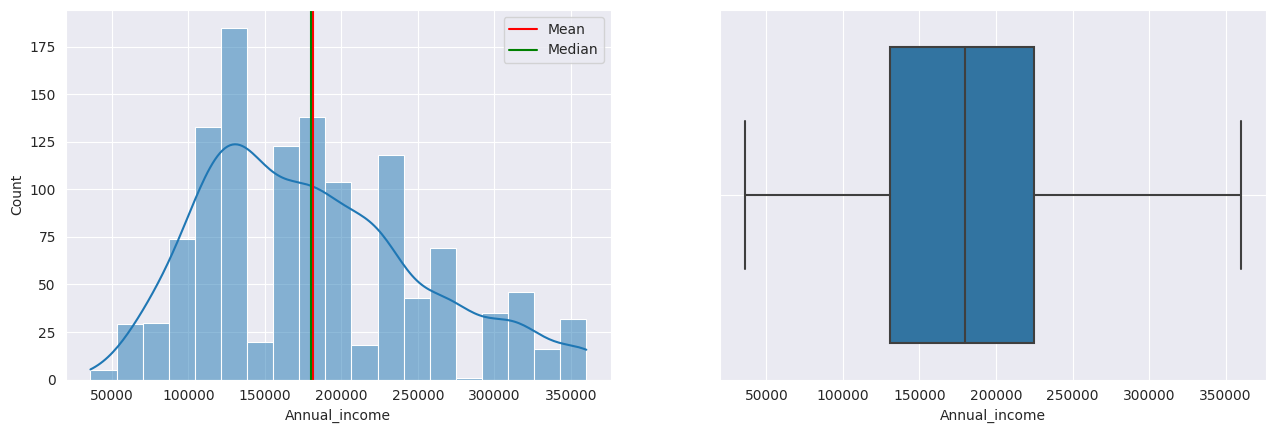

In [59]:
# Verifying by plotting the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

**2) Experience_years Column**

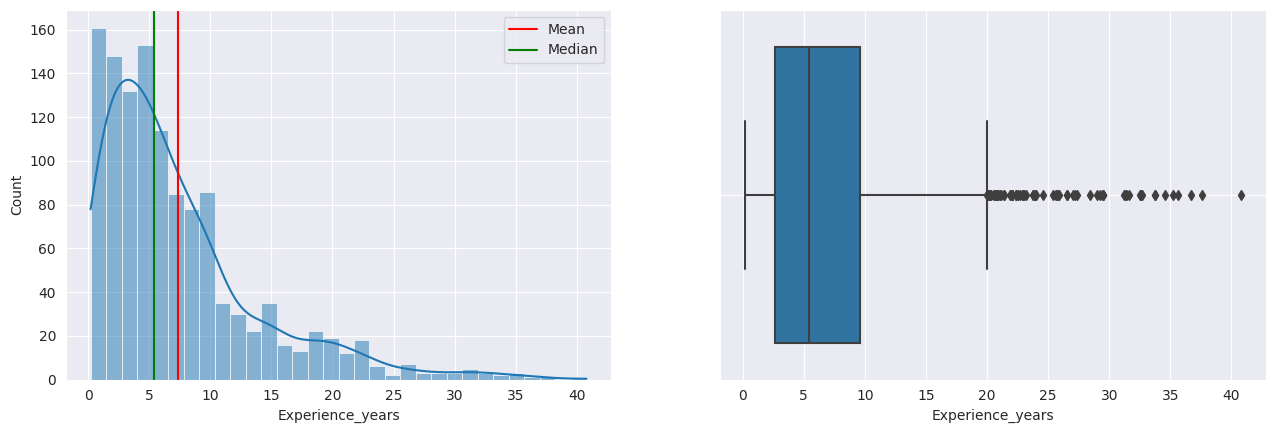

In [60]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Experience_years',kde=True)
plt.axvline(x=df['Experience_years'].mean(),color="red",label="Mean")
plt.axvline(x=df['Experience_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Experience_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

In [61]:
# using IQR method to handle the outliers

Q1 = np.percentile(df['Experience_years'], 25 , interpolation='midpoint')
Q3 = np.percentile(df['Experience_years'], 75 ,interpolation='midpoint')

IQR = Q3-Q1


In [62]:
# checking for upper limit value

upper_limit = Q3+1.5*IQR

upper_limit

19.982876712328768

In [63]:
# applying upperlimit value

df = df[df['Experience_years'] < upper_limit]

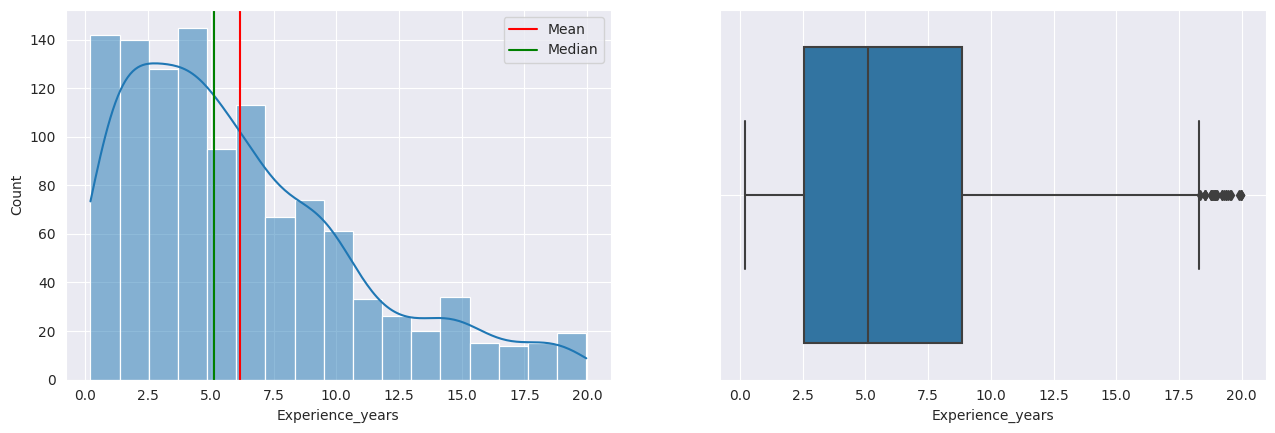

In [64]:
# verifying the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=df, x='Experience_years',kde=True)
plt.axvline(x=df['Experience_years'].mean(),color="red",label="Mean")
plt.axvline(x=df['Experience_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Experience_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

- Using Square root method to stabilize variance, making the data more normally distributed

In [65]:
df['Experience_years'] = np.sqrt(df['Experience_years'])

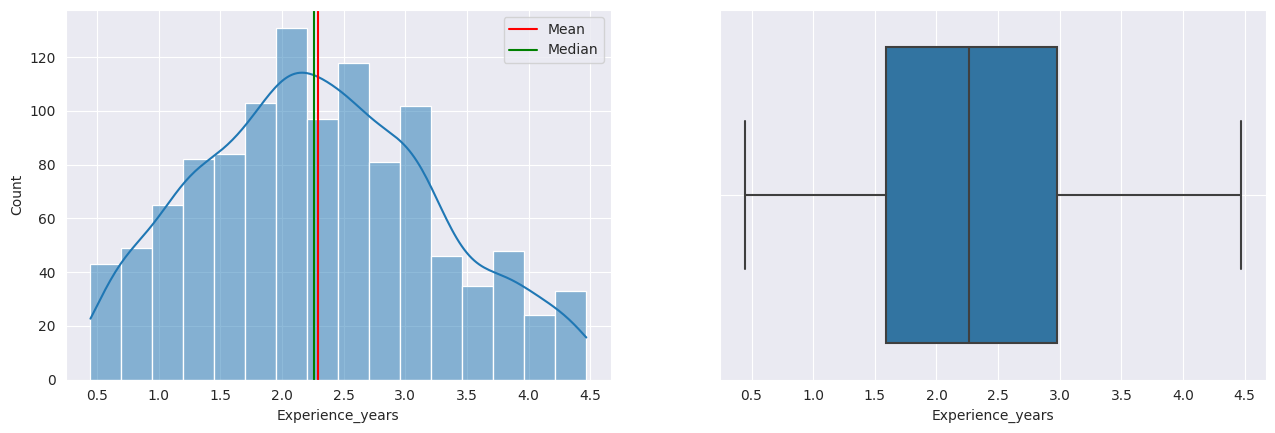

In [66]:
# verifying the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=df, x='Experience_years',kde=True)
plt.axvline(x=df['Experience_years'].mean(),color="red",label="Mean")
plt.axvline(x=df['Experience_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Experience_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

**3) Family_members Column**

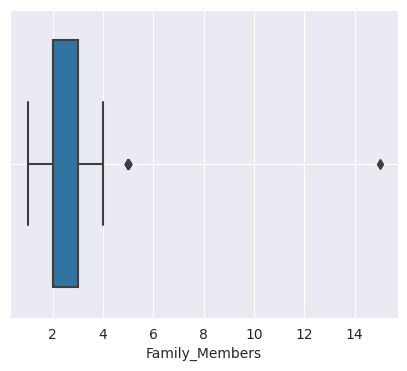

In [67]:
plt.figure(figsize =(5,4))

sns.boxplot(data=df , x='Family_Members')

plt.grid()
plt.show()

In [68]:
# removing the exterme value

df = df[df['Family_Members'] < 14]

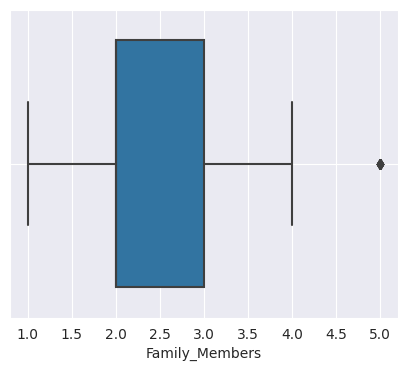

In [69]:
plt.figure(figsize =(5,4))

sns.boxplot(data=df , x='Family_Members')

plt.grid()
plt.show()

In [70]:
# finally checking the shape

df.shape

(1140, 17)

In [71]:
df.head()

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Family_Members,label,Age_in_years,Experience_years
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.267075
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,40.219428,1.267075
3,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.267075
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.267075
5,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.267075


In [ ]:
# Expoting to CSV file

df.to_csv('cleaned_data.csv')

Dropping the columns

- **Children** : Children and family_members are corelated to each other, so dropping.

- **Mobile_phone** : No variation in data, contains single category value only.

In [72]:
df = df.drop(columns=['Children','Mobile_phone'])

In [73]:
# cheking shape

df.shape

(1140, 15)

# **Feature Transformation**

**1) Binary Encoding**

In [74]:
# for gender column
df['Gender'] = df['Gender'].map({'M':1,'F':0})

# for Car_Owner column
df['Car_Owner'] = df['Car_Owner'].map({'Y':1,'N':0})

# for Property_owner column
df['Property_owner'] = df['Property_owner'].map({'Y':1,'N':0})

In [75]:
df.sample(5)

,Gender,Car_Owner,Property_owner,Annual_income,Income_type,Education,Marital_status,Housing_type,Work_Phone,Phone,Email_ID,Family_Members,label,Age_in_years,Experience_years
1127,0,0,1,225000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,0,2,0,35.742466,1.355860
1244,0,0,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2,0,53.717808,3.427528
585,0,0,0,157500.0,Commercial associate,Incomplete higher,Married,With parents,0,0,0,3,0,32.715068,2.749844
454,1,0,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,3,0,27.715068,1.552726
421,0,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,3,0,33.005479,3.071299


**2) Ordinal Encoding on 'Education' Column**

In [76]:
df['Education'].value_counts()

Secondary / secondary special    733
Higher education                 330
Incomplete higher                 62
Lower secondary                   14
Academic degree                    1
Name: Education, dtype: int64

In [77]:
# importing ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# values to ordinal
cols_order = ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education', 'Academic degree']

x = OrdinalEncoder(categories=[cols_order])

df['Education'] = x.fit_transform(df[['Education']])

In [78]:
df.sample(5)

,Gender,Car_Owner,Property_owner,Annual_income,Income_type,Education,Marital_status,Housing_type,Work_Phone,Phone,Email_ID,Family_Members,label,Age_in_years,Experience_years
85,1,0,1,157500.0,Working,1.0,Married,House / apartment,0,0,0,2,1,42.849315,1.907448
845,0,0,1,90000.0,Working,1.0,Married,House / apartment,0,0,0,2,0,29.728767,1.504332
1154,1,1,0,202500.0,Working,3.0,Married,House / apartment,0,0,0,4,0,32.153425,1.411305
1478,0,1,1,225000.0,Commercial associate,3.0,Married,House / apartment,1,1,0,3,0,46.580822,1.483240
735,0,0,0,130500.0,Working,1.0,Married,House / apartment,0,0,0,4,0,42.290411,3.085982


**3) One hot Encodeing**

In [79]:
# columns to onehot encoding
one_cols = df[['Income_type','Marital_status','Housing_type']]

df = pd.get_dummies(df, columns=['Income_type','Marital_status','Housing_type'],drop_first=True)  # drop_first to avoid multicolinearity

In [80]:
df.sample(5)

,Gender,Car_Owner,Property_owner,Annual_income,Education,Work_Phone,Phone,Email_ID,Family_Members,label,...,Income_type_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
1454,0,1,1,247500.0,1.0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
555,1,1,1,180000.0,1.0,0,0,0,3,0,...,0,1,0,0,0,1,0,0,0,0
1236,0,0,0,315000.0,1.0,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,0
705,0,1,0,225000.0,3.0,0,0,0,2,0,...,1,0,0,0,0,1,0,0,0,0
482,0,0,1,103500.0,2.0,0,0,0,2,0,...,1,1,0,0,0,1,0,0,0,0


In [81]:
# checking the shape

df.shape

(1140, 24)

# **Dealing with Imabalance in Dataset**

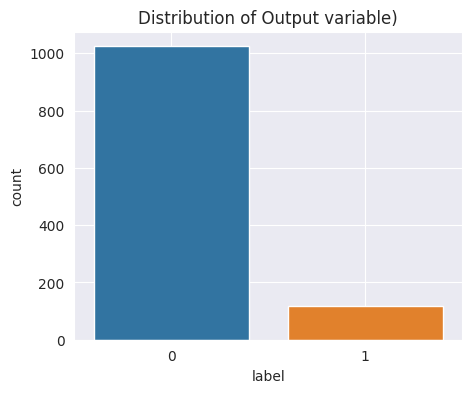

In [82]:

plt.figure(figsize = (5,4))
sns.countplot( data= df, x ='label')
plt.title("Distribution of Output variable)")

plt.grid()
plt.show()

In [83]:
# checking unique values

df['label'].value_counts()

0    1024
1     116
Name: label, dtype: int64

Performing SMOTE to handle thsis imbalance in the data.

In [84]:
X = df.drop(columns=['label'])
y = df['label']

# importing SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [85]:
# checking values after applying smote

y.value_counts()

1    1024
0    1024
Name: label, dtype: int64

**Splitting the dataset into train and test**

In [86]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=10)

In [87]:
# training data

X_train.shape

(1638, 23)

In [88]:
# test data

X_test.shape

(410, 23)

# **Feature Scaling**

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# **Model Training**

In [100]:
# Required imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,roc_auc_score

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=10)
dtc = DecisionTreeClassifier(random_state=10)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')
svc = SVC(random_state=10)
knn = KNeighborsClassifier()

In [101]:
# Dictionary to store results
results = {}

# List of classifiers
classifiers = [('Logistic Regression', log_reg),
               ('Decision Tree', dtc),
               ('Random Forest', rfc),
               ('XGBoost', xgb),
               ('Support Vector Machine', svc),
               ('K-Nearest Neighbors', knn)]

# Train, predict, and store results
for name, clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1 , roc_auc_test]

In [102]:
# Convert the results dictionary to a DataFrame for better visualization

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']).T
results_df

,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
Logistic Regression,0.763415,0.816327,0.723982,0.767386,0.766753
Decision Tree,0.882927,0.877729,0.909502,0.893333,0.880677
Random Forest,0.926829,0.936073,0.927602,0.931818,0.926764
XGBoost,0.926829,0.924444,0.941176,0.932735,0.925615
Support Vector Machine,0.821951,0.855769,0.805430,0.829837,0.823350
K-Nearest Neighbors,0.846341,0.803846,0.945701,0.869023,0.837930


# **Model Selection**

- **XGBOOST**

- **Performance and Accuracy**: XGBoost consistently demonstrated superior performance in terms of accuracy, precision, and recall when compared to other models on the dataset.

- **Interpretability and Feature Importance**: XGBoost provides clear insights into the significance of different features in making predictions.

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

<Figure size 600x600 with 0 Axes>

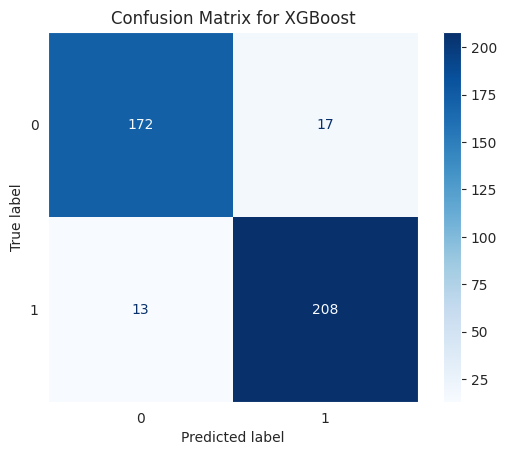



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       189
           1       0.92      0.94      0.93       221

    accuracy                           0.93       410
   macro avg       0.93      0.93      0.93       410
weighted avg       0.93      0.93      0.93       410



In [103]:
# Predict using the trained XGBoost model
y_pred_xgb = xgb.predict(X_test_scaled)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='.0f')
plt.title("Confusion Matrix for XGBoost")
plt.grid(False)
plt.show()
print("\n")
# Classification Report
print("Classification Report for XGBoost:\n")

print(classification_report(y_test, y_pred_xgb))


# **Hyperparameter Tuning**

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
# the parameter grid

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# initialize GridSearchCV
clf_xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(clf_xgb, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}


**Testing the Model**

In [106]:
# Initialize the XGBoost classifier with the best parameters

xgb_best = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.9,
    random_state=10,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_best = xgb_best.predict(X_test_scaled)

# Calculate and print the metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best}")
print(f"Precision after Hyperparameter Tuning: {precision_best}")
print(f"Recall after Hyperparameter Tuning: {recall_best}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best}")


Accuracy after Hyperparameter Tuning: 0.9292682926829269
Precision after Hyperparameter Tuning: 0.9324324324324325
Recall after Hyperparameter Tuning: 0.9366515837104072
F1-Score after Hyperparameter Tuning: 0.9345372460496614
ROC AUC Score after Hyperparameter Tuning: 0.928643252172664


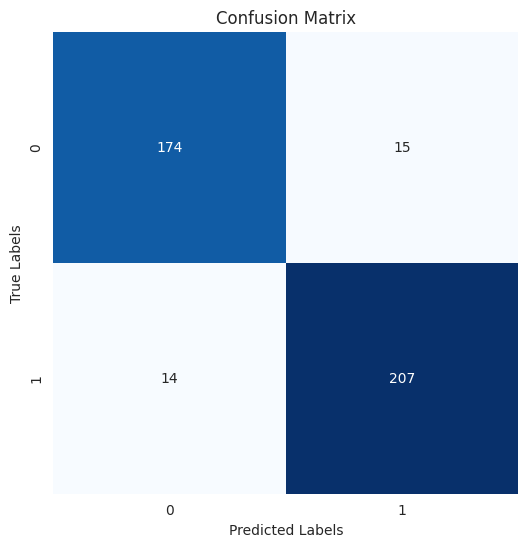

In [109]:
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [111]:
# Save the model

xgb_best.save_model('xgboost_model.pkl')


# **Feature Importance**

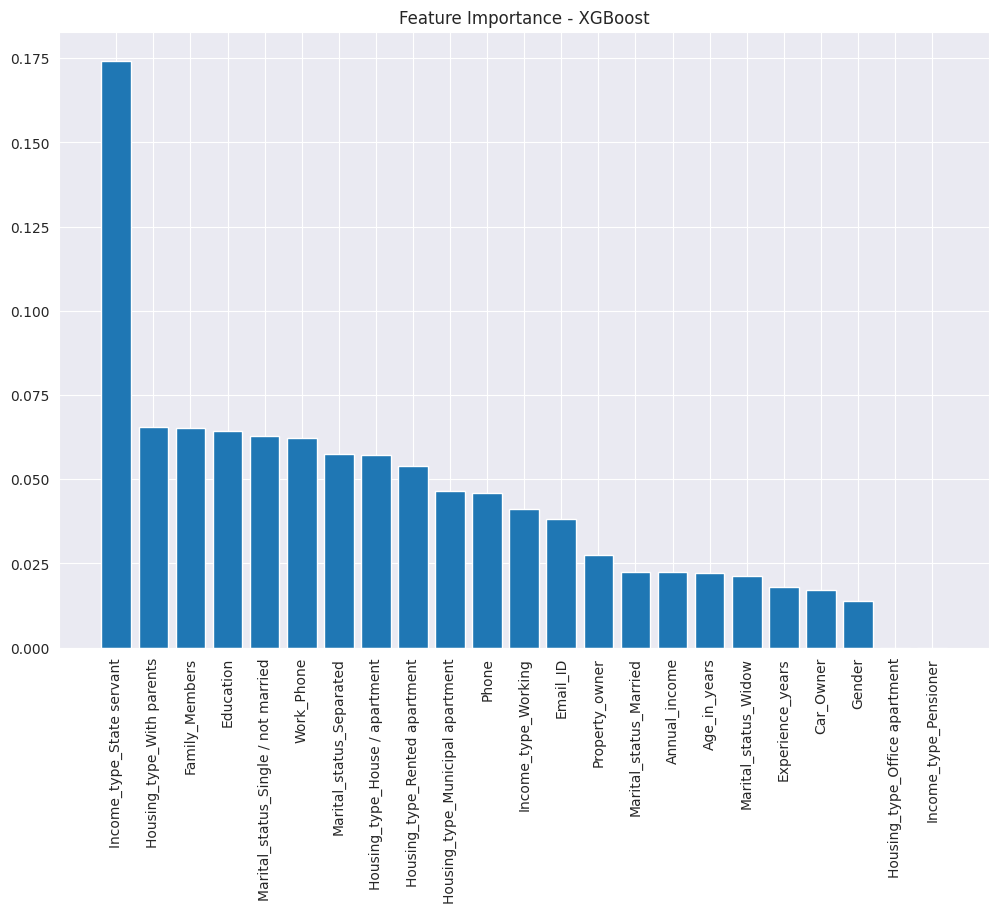

In [110]:
# Calculating feature importances

feature_importances = xgb.feature_importances_

# Sort the feature importances in descending order and get the indices

sorted_indices = np.argsort(feature_importances)[::-1]

# Ploting feature importances
plt.figure(figsize=(12, 8))

plt.title("Feature Importance - XGBoost")
plt.bar(X.columns[sorted_indices], feature_importances[sorted_indices])
plt.xticks(rotation=90)
plt.grid()
plt.show()


# **Conclusion**

- In this project, we embarked on the journey of building a predictive model for credit card approval. After exploring multiple algorithms, we finalized XGBoost due to its robustness and efficiency in handling tabular data with a mix of different variable types.

- We utilized **XGBoost**, a gradient boosting algorithm, known for its high performance in classification problems

- **Performance Metrics**: The model after hyperparameter tuning achieved an accuracy of approximately 92.93%. Notably, the precision and recall were also high, indicating 93.24% and 93.67% respectively. The F1-Score, which is the harmonic mean of precision and recall, stood at 93.45%, further cementing the model's reliability. The ROC AUC Score, which gives us the area under the curve for true positive rate vs false positive rate, was approximately 92.86%.

- Through diligent preprocessing, model selection, and hyperparameter tuning, we've crafted a robust model for credit card approval predictions. This model not only boasts high accuracy but also ensures a balanced trade-off between precision and recall, thus making it a valuable asset for financial institutions aiming to streamline their credit card approval processes.